#  Regression on House Pricing Dataset: Variable Selection & Regularization
We consider a reduced version of a dataset containing house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

[https://www.kaggle.com/harlfoxem/housesalesprediction]

For each house we know 18 house features (e.g., number of bedrooms, number of bathrooms, etc.) plus its price, that is what we would like to predict.

## TO DO 1: insert your ID number ("numero di matricola") below

In [1]:
#put here your ``numero di matricola''
numero_di_matricola = 1205720

In [2]:
#import all packages needed
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data, remove data samples/points with missing values (NaN) and take a look at them.

In [3]:
#load the data
df = pd.read_csv('kc_house_data.csv', sep = ',')

#remove the data samples with missing values (NaN)
df = df.dropna() 

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,3.164000e+03,3.164000e+03,3164.000000,3164.000000,3164.000000,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,4.645240e+09,5.354358e+05,3.381163,2.071903,2070.027813,1.525054e+04,1.434893,0.009798,0.244311,3.459229,7.615676,1761.252212,308.775601,1967.489254,94.668774,98077.125158,47.557868,-122.212337,1982.544564,13176.302465
std,2.854203e+09,3.809004e+05,0.895472,0.768212,920.251879,4.254457e+04,0.507792,0.098513,0.776298,0.682592,1.166324,815.934864,458.977904,28.095275,424.439427,54.172937,0.140789,0.139577,686.256670,25413.180755
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,6.490000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,620.000000,660.000000
25%,2.199775e+09,3.150000e+05,3.000000,1.500000,1430.000000,5.453750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1950.000000,0.000000,98032.000000,47.459575,-122.324250,1480.000000,5429.500000
50%,4.027701e+09,4.450000e+05,3.000000,2.000000,1910.000000,8.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1545.000000,0.000000,1969.000000,0.000000,98059.000000,47.572500,-122.226000,1830.000000,7873.000000
75%,7.358175e+09,6.402500e+05,4.000000,2.500000,2500.000000,1.122250e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2150.000000,600.000000,1990.000000,0.000000,98117.000000,47.680250,-122.124000,2360.000000,10408.250000
max,9.839301e+09,5.350000e+06,8.000000,6.000000,8010.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,6720.000000,2620.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,425581.000000


Extract input and output data. We want to predict the price by using features other than id as input.

In [4]:
Data = df.values

# m = number of input samples
m = 3164
Y = Data[:m,2]
X = Data[:m,3:]


## Data Pre-Processing

Split the data into training  set of $m_{train}=50$ samples, validation set of $m_{val}$ samples and a test set of $m_{test}:=m-m_{train}-m_{val}$ samples.

In [5]:
# Split data into train (50 samples) and test data (the rest)
m_train = 20

m_test = m - m_train 
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=m_test/m, random_state=numero_di_matricola)


Standardize the data.

In [6]:
# Data pre-processing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

## Linear Regression with Squared Loss Solution

Now compute the solution for linear regression with squared loss (i.e., the Least-Squares estimate) using LinearRegression() in Scikit-learn, and print the corresponding average loss in training and test data.

Since the average loss can be quite high, we also compute the coefficient of determination $R^2$ and look at $1 - R^{2}$ to have an idea of what the average loss amounts to. To compute the coefficient of determination you can use the "score(...)" function.

In [7]:
# Least-Squares
from sklearn import linear_model 
#LR the linear regression model
LR = linear_model.LinearRegression()

#fit the model on training data
LR.fit(Xtrain_scaled, Ytrain)

#obtain predictions on training data
Ytrain_predicted = LR.predict(Xtrain_scaled)

#obtain predictions on test data
Ytest_predicted = LR.predict(Xtest_scaled)

#coefficients from the model
w_LR = np.hstack((LR.intercept_, LR.coef_))

#average error in training data
loss_train = np.linalg.norm(Ytrain - Ytrain_predicted)**2/m_train

#average error in test data
loss_test = np.linalg.norm(Ytest - Ytest_predicted)**2/m_test

#print average loss in training data and in test data
print("Average loss in training data:"+str(loss_train))
print("Average loss in test data:"+str(loss_test))

#print 1 - coefficient of determination in training data and in test data
print("1 - coefficient of determination on training data:"+str(1 - LR.score(Xtrain_scaled,Ytrain)))
print("1 - coefficient of determination on test data:"+str(1 - LR.score(Xtest_scaled,Ytest)))

Average loss in training data:2753423367.642774
Average loss in test data:305201847503.98944
1 - coefficient of determination on training data:0.052346987946457646
1 - coefficient of determination on test data:2.096129824603785


### Confidence Intervals

We now compute the confidence interval for each coefficient.

In [8]:
# Least-Squares: Confidence Intervals
from scipy.stats import t

Xtrain_im_testrcept = np.hstack((np.ones((Xtrain_scaled.shape[0],1)), Xtrain_scaled))

#alpha for confidence im_testrvals
alpha = 0.05

d = Xtrain_scaled.shape[1]-1

#quantile from t-student distribution
tperc = t.ppf(1-alpha/2, m_train-d-1, loc=0, scale=1)
sigma2 = np.linalg.norm(Ytrain-Ytrain_predicted)**2/(m_train-d-1)

R = np.dot(Xtrain_im_testrcept.transpose(),Xtrain_im_testrcept)
Ur, Sr, Vr = np.linalg.svd(R, full_matrices=1, compute_uv=1)


Sri = 1/Sr
Sri = Sri*(Sri<1e10)

#print(Sri)

Ri2 = np.dot(Ur,np.dot(np.diag(Sri),np.transpose(Ur)))

#print(np.diag(Ri2))
#print(sigma2)
v = np.sqrt(np.diag(Ri2))
Delta = np.sqrt(sigma2)*v*tperc
CI = np.transpose(np.vstack((w_LR,w_LR))) + np.transpose(np.vstack((-Delta,+Delta) ))

Plot the LS coefficients and their confidence im_testrval.

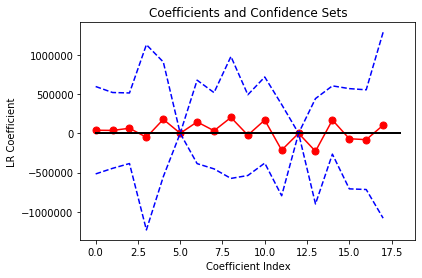

In [9]:
# Plot confidence im_testrvals
plt.figure(1)
plt.plot(w_LR[1:], 'r', marker='o', ms=7.0)
plt.plot(CI[1:,0], 'b--')
plt.plot(CI[1:,1], 'b--')
plt.plot(np.zeros(w_LR.shape[0],), 'k', linewidth=2.0)
plt.xlabel('Coefficient Index')
plt.ylabel('LR Coefficient')
plt.title('Coefficients and Confidence Sets')
plt.show()

### Question: based on the results above, if you had to choose at most 4 features for a linear regression model, which ones would you choose? Why?
Based on the null hypothesis testing I would choose the features at index 3, 7, 14 and 16 because i consider the only ones that have the confidence interval which do not include the origin, and therefore are relevant for the prediction.
In particular the features with index 14, 16 and 3 (see code below) clearly do not include the origin, instead the feature with index 7 seem the most relevant of the remainings which all include 0 in their CI.
### TO DO 2
Answer the question above (max 5 lines)

In [255]:
f = [4,8,15,17]
for w in range(len(f)):
    print("feature %i"%(f[w]-1))
    print(CI[f[w]])

feature 3
[-1229794.32631503  1127671.89832095]
feature 7
[-453017.85363505  517521.40591213]
feature 14
[-265409.93518166  603491.34552557]
feature 16
[-715546.95619975  553218.80710621]


## Best-Subset Selection

Split the (previous) training data (i.e., the 50 samples chosen above) into a training data and validation dataset to perform best-subset selection. For splitting, put 50% of the data into the validation set.

For $k$ going from 1 to $n_{sub}=4$:
1. Compute the best model for all the possible subsets of $k$ features
2. Compute the prediction error on the validation dataset

Finally we choose the subset of $k^*$ features giving the lowest validation error.


In [256]:
import itertools
import math 

m_trainBSS=int(math.ceil(m_train/2))
m_valBSS=m_train-m_trainBSS


Xtrain_BSS = Xtrain_scaled[:m_trainBSS,:]
Ytrain_BSS = Ytrain[:m_trainBSS]
Xval_BSS = Xtrain_scaled[m_trainBSS:,:]
Yval_BSS = Ytrain[m_trainBSS:,]

nsub = 4
features_idx_dict = {}
validation_err_dict = {}
validation_err_min = np.zeros(nsub,)
validation_err_min_idx = np.zeros(nsub, dtype=np.int64)
for k in range(1,nsub+1):
    features_idx = list(itertools.combinations(range(Xtrain_BSS.shape[1]),k))
    validation_error = np.zeros(len(features_idx),)
    for j in range(len(features_idx)):
        LR_subset = linear_model.LinearRegression()
        LR_subset.fit(Xtrain_BSS[:,features_idx[j]], Ytrain_BSS)
        validation_error[j] = np.linalg.norm(Yval_BSS - LR_subset.predict(Xval_BSS[:,features_idx[j]]))**2/m_valBSS 
    validation_err_min[k-1] = np.min(validation_error)    
    validation_err_min_idx[k-1] = np.argmin(validation_error)
    features_idx_dict.update({k: features_idx})
    validation_err_dict.update({k: validation_error})

print("Validation error as a function of k (starting at k=2): "+str(validation_err_min))

Validation error as a function of k (starting at k=2): [7.77449742e+10 6.91638219e+10 6.43047537e+10 5.24460525e+10]


Plot the validation error as a function of the number of retained features.

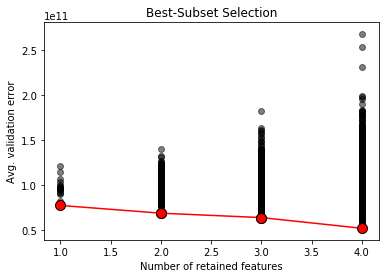

In [257]:
# Plot
plt.figure(2)
for k in range(1,nsub+1):
    plt.scatter(k*np.ones(validation_err_dict[k].shape), validation_err_dict[k], color='k', alpha=0.5)
    #plt.scatter(k, validation_err_min[k-1], color='r', alpha=0.8)
    if k > 1:
        plt.plot([k-1, k], [validation_err_min[k-2], validation_err_min[k-1]], color='r',marker='o', 
            markeredgecolor='k', markerfacecolor = 'r', markersize = 10)
plt.xlabel('Number of retained features')
plt.ylabel('Avg. validation error')
plt.title('Best-Subset Selection')
plt.show()

Compute the model using the selected subset of features.

### TO DO 3: pick the number of features for the best subset according to figure above, learn the model on the entire training data (i.e., the 50 samples chosen at the beginnin), and compute score on training and on test data

In [258]:
LR_best_subset = linear_model.LinearRegression()

# now pick the number of features according to best subset
opt_num_features = np.argmin(validation_err_min)+1

#opt_features_idx contains the indices of the features from best subset
opt_features_idx = features_idx[validation_err_min_idx[3]]

#let's print the indices of the features from best subset
print(opt_features_idx)

#fit the best subset on the entire training set
LR_best_subset.fit(Xtrain_scaled[:,opt_features_idx], Ytrain)

#obtain predictions on training data
Ytrain_predicted_best_subset = LR_best_subset.predict(Xtrain_scaled[:,opt_features_idx])

#obtain predictions on test data
Ytest_predicted_best_subset = LR_best_subset.predict(Xtest_scaled[:,opt_features_idx])

#average loss in training data
loss_train_best_subset = np.linalg.norm(Ytrain - Ytrain_predicted_best_subset)**2/m_train

#average loss in test data
loss_test_best_subset = np.linalg.norm(Ytest - Ytest_predicted_best_subset)**2/m_test

#print average loss in training data and in test data
print("Average loss in training data:"+str(loss_train_best_subset))
print("Average loss in test data:"+str(loss_test_best_subset))

#now print 1-  the coefficient of determination on training and on test data to get an idea to what the average
#loss corresponds to
print("1 - coefficient of determination of best subset on training data: "+str(1 - LR_best_subset.score(Xtrain_scaled[:,opt_features_idx],Ytrain)))
print("1 - coefficient of determination of best subset on test data: "+str(1 - LR_best_subset.score(Xtest_scaled[:,opt_features_idx],Ytest)))

(0, 2, 7, 14)
Average loss in training data:13177418592.58141
Average loss in test data:72744636871.77332
1 - coefficient of determination of best subset on training data: 0.25052383165536496
1 - coefficient of determination of best subset on test data: 0.49961100882557175


### TO DO 4: do the features from best subset selection correspond to the ones you would have chosen based on confidence intervals for the linear regression coefficients? Comment (max 5 lines)

The features are very similar, the only different one is the first one: 3 with confidence intervals and 6 with best subset selection. Using the features chosen based on confidence intervals leads to have an average test loss is a bit worst than using the best subset selection. This mean that the four features above describe very well the prediction of houses price. A better result maybe can be obtained in terms of test loss using k-fold cross-validation instead of a simple validation technique because the data we use is very limited.

## Lasso

### TO DO 5
Use the routine *lasso_path* from *sklearn.linear_regression* to compute the "lasso path" for different values of the regularization parameter $\lambda$. You should first fix a grid a possible values of lambda (the variable "lasso_lams"). For each entry of the vector "lasso_lams" you should compute the corresponding model (The i-th column of the vector  "lasso_coefs" should contain the coefficients of the linear model computed using lasso_lams[i] as regularization parameter).

Be careful that the grid should be chosen appropriately.

Note that the parameter $\lambda$ is called $\alpha$ in the Lasso model from sklearn


In [259]:
from sklearn.linear_model import lasso_path

# select a grid of possible regularization parameters 
# (be carefull how this is chosen, you may have to refine the choice after having seen the results)

#Note: lasso_lams is supposed to be a numpy array
lasso_lams = np.logspace(1, 5, num = 150)
# Use the function lasso_path to compute the "lasso path", passing in input the lambda values
# you have specified in lasso_lams
lasso_lams, lasso_coefs, _ = lasso_path(Xtrain_scaled,Ytrain,alphas=lasso_lams)

Evaluate the sparsity in the estimated coefficients as a function of the regularization parameter $\lambda$: to this purpose, compute the number of non-zero entries in the estimated coefficient vector.

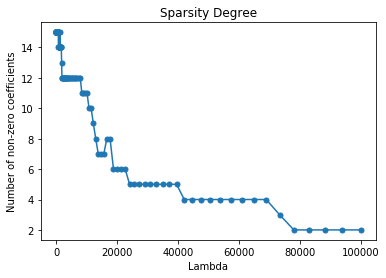

In [260]:
l0_coef_norm = np.zeros(len(lasso_lams),)

for i in range(len(lasso_lams)):
    l0_coef_norm[i] = sum(lasso_coefs[:,i]!=0)

    
plt.figure(6)
plt.plot(lasso_lams, l0_coef_norm, marker='o', markersize=5)
plt.xlabel('Lambda')
plt.ylabel('Number of non-zero coefficients')
plt.title('Sparsity Degree')
plt.show()

### TO DO 6: explain the results you observe in the figure above (max 5 lines)

As expected, increasing the value of lambda adds bias to the estimation and this leads to reduce the complexity of ||<b>w</b>|| decreasing the number of non-zero coefficients, thus simplifying the model. Using a logarithmic grid with 150 values of lambda allowed to find at least one lambda value for each number of non-zero coefficients.

### TO DO 7: Use k-fold Cross-Validation to fix the regularization parameter

Use the scikit-learn built-in routine *Lasso* (from the *linear_regression* package) to compute the lasso  coefficients.

Use *KFold* from *sklearn.cross_validation* to split the data (i.e. Xtrain_scaled and Ytrain) into the desired number of folds.

The pick $lam\_opt$ to be the chosen value for the regularization parameter.

In [261]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

num_folds = 5

kf = KFold(n_splits = num_folds)

#loss_ridge_kfold will contain the value of the loss
loss_lasso_kfold = np.zeros(len(lasso_lams),)

for i in range(len(lasso_lams)):
    
    #define a lasso model   using Lasso() for the i-th value of lam_values
    lasso_kfold = Lasso(alpha=lasso_lams[i],max_iter=20000)
    for train_index, validation_index in kf.split(Xtrain_scaled):
        Xtrain_kfold, Xval_kfold = Xtrain_scaled[train_index], Xtrain_scaled[validation_index]
        Ytrain_kfold, Yval_kfold = Ytrain[train_index], Ytrain[validation_index]
        
        #learn the model using the training data from the k-fold
        
        lasso_kfold.fit(Xtrain_kfold, Ytrain_kfold)
        
        #compute the loss using the validation data from the k-fold
        
        Yval_kfold_predicted = lasso_kfold.predict(Xval_kfold)
        loss_lasso_kfold[i] += np.linalg.norm(Yval_kfold - lasso_kfold.predict(Xval_kfold))**2/Yval_kfold.shape[0]
    #loss_lasso_kfold[i] = np.linalg.norm(Yval_kfold - Yval_kfold_predicted)**2

    
# loss_lass_kfold shoulw be the average loss observed in the folds
loss_lasso_kfold /= num_folds

#choose the regularization parameter that minimizes the loss
lasso_lam_opt = lasso_lams[np.argmin(loss_lasso_kfold)]
print("Best value of the regularization parameter:", lasso_lam_opt)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best value of the regularization parameter: 100000.0


Plot the Cross-Validation estimate of the prediction error as a function of the regularization parameter

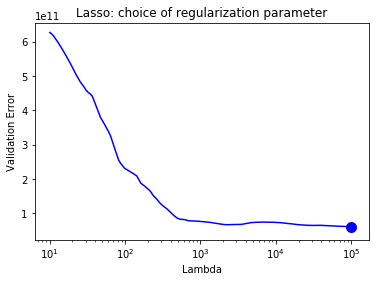

Total number of coefficients:18
Number of non-zero coefficients:2.0
Best value of regularization parameter:100000.0


In [262]:
plt.figure(4)
plt.xscale('log')
plt.plot(lasso_lams, loss_lasso_kfold, color='b')
plt.scatter(lasso_lams[np.argmin(loss_lasso_kfold)], loss_lasso_kfold[np.argmin(loss_lasso_kfold)], color='b', marker='o', linewidths=5)
plt.xlabel('Lambda')
plt.ylabel('Validation Error')
plt.title('Lasso: choice of regularization parameter')
plt.show()
print("Total number of coefficients:"+str(len(lasso_kfold.coef_)))
#print("Number of non-zero coefficients:"+str(sum(lasso_kfold.coef_ != 0)))
print("Number of non-zero coefficients:"+str(l0_coef_norm[np.nonzero(lasso_lams==lasso_lam_opt)[0][0]]))
print("Best value of regularization parameter:"+str(lasso_lam_opt))

### TO DO 8 now estimate the lasso coefficients using all the training data and the optimal regularization parameter (chosen at previous step)

In [263]:
# Estimate Lasso  Coefficients with all data (trainval) for the the optimal value lasso_lam_opt of the regularization paramter

#define the model
lasso_reg = linear_model.Lasso(alpha=lasso_lam_opt)

#fit using the training data

lasso_reg.fit(Xtrain_scaled,Ytrain)
predict_train = lasso_reg.predict(Xtrain_scaled)
predict_test = lasso_reg.predict(Xtest_scaled)

#average loss on training data
loss_train_lasso = np.linalg.norm(Ytrain - predict_train)**2/m_train
#average loss on test data
loss_test_lasso = np.linalg.norm(Ytest - predict_test)**2/m_test

#print average loss in training data and in test data
print("Average loss in training data:"+str(loss_train_lasso))
print("Average loss in test data:"+str(loss_test_lasso))

#now print 1-  the coefficient of determination on training and on test data to get an idea to what the average
#loss corresponds to
print("1 - coefficient of determination on training data:"+str(1 - lasso_reg.score(Xtrain_scaled,Ytrain)))
print("1 - coefficient of determination on test data:"+str(1 - lasso_reg.score(Xtest_scaled,Ytest)))

Average loss in training data:39688172913.18077
Average loss in test data:114620294261.59744
1 - coefficient of determination on training data:0.754535729418834
1 - coefficient of determination on test data:0.7872135089334813


Compare the LR and the Lasso coefficients.

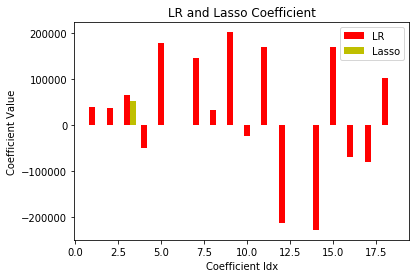

In [264]:
# Compare LR and lasso coefficients
ind = np.arange(1,len(LR.coef_)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, LR.coef_, width, color='r')
rects2 = ax.bar(ind + width, lasso_reg.coef_, width, color='y')
ax.legend((rects1[0], rects2[0]), ('LR', 'Lasso'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('LR and Lasso Coefficient')
plt.show()

## Ridge Regression

## TO DO 9
### Use Ridge regression with cross-validation

We perform Ridge regression (i.e., linear regression with squared loss and L2 regularization) for different values of the regularization parameter $\alpha$ (called $\lambda$ in class), and use the Scikit-learn function to perform cross-validation (CV).

In Ridge regression for scikit learn, the objective function is:

$$
    ||y - Xw||^2_2 + \alpha * ||w||^2_2
$$

In the code below:
- use RidgeCV() to select the best value of $\alpha$ with a 5-fold CV with L2 penalty;
- use Ridge() to learn the best model for the best $\alpha$ for ridge regression using the entire training set (i.e., the 50 samples chosen at the beginning)

Note that RidgeCV() picks some default values of $\alpha$ to try, but we decide to pass the same values used for the Lasso.




In [265]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

#let's define the values of alpha to use
ridge_alphas = lasso_lams = np.logspace(1, 5, num = 150)

#define the model using RidgeCV passing the vector of alpha values and the cv value (= number of folds)
ridge = RidgeCV(alphas=ridge_alphas,cv=5)

#fit the model on training data

ridge.fit(Xtrain_scaled,Ytrain)

# the attribute 'alpha_' contains the best value of alpha as identified by cross-validation;
# let's print it

print("Best value of parameter alpha according to 5-fold Cross-Validation: "+str(ridge.alpha_))

#define the model using the best alpha; note that various solvers are availalbe, choose
# an appropriate one
ridge_final = Ridge(alpha=ridge.alpha_,solver='lsqr')

#fit the model using the best C on the entire training set

ridge_final.fit(Xtrain_scaled,Ytrain)
predict_train = ridge_final.predict(Xtrain_scaled)
predict_test = ridge_final.predict(Xtest_scaled)

#average loss on training data
loss_train_ridge = np.linalg.norm(Ytrain - predict_train)**2/m_train

#average loss on test data
loss_test_ridge = np.linalg.norm(Ytest - predict_test)**2/m_test

#print average loss in training data and in test data
print("Average loss in training data:"+str(loss_train_ridge))
print("Average loss in test data:"+str(loss_test_ridge))

#now print 1-  the coefficient of determination on training and on test data to get an idea to what the average
#loss corresponds to
print("1 - coefficient of determination on training data:"+str(1 - ridge_final.score(Xtrain_scaled,Ytrain)))
print("1 - coefficient of determination on test data:"+str(1 - ridge_final.score(Xtest_scaled,Ytest)))

Best value of parameter alpha according to 5-fold Cross-Validation: 100000.0
Average loss in training data:52551651640.45825
Average loss in test data:149407746551.92368
1 - coefficient of determination on training data:0.9990910614463899
1 - coefficient of determination on test data:1.0261341342969317


Compare LR, Lasso, and Ridge regression coefficients

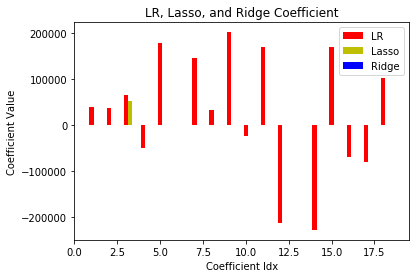

In [266]:
# Compare LR and lasso coefficients
ind = np.arange(1,len(LR.coef_)+1)  # the x locations for the groups
width = 0.25       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, LR.coef_, width, color='r')
rects2 = ax.bar(ind + width, lasso_reg.coef_, width, color='y')
rects3 = ax.bar(ind + 2*width, ridge_final.coef_, width, color='b')
ax.legend((rects1[0], rects2[0], rects3[0]), ('LR', 'Lasso', 'Ridge'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('LR, Lasso, and Ridge Coefficient')
plt.show()

## TODO 10: comment on the coefficients obtained by the different methods and their comparison (max 5 lines)
The coefficients of all three methods are consistent. Lasso regression is used for feature selection, in this case using an optimal lambda found with k-fold Cross-Validation, the predictor uses nine features that works well in term of test loss, even better of LR with best subset. The LR and Ridge coefficients behave in a similar way, but the Ridge model define better the weights giving what appears to be a more fine-tuned model, as proven below examining the test loss. In fact it is also the best model found.



## Comparison of models: evaluation of the performance on the test set



In [267]:
print("Average loss of LR on test data:"+str(loss_test))
print("Average loss of LR with subset selection on test data:"+str(loss_test_best_subset))
print("Average loss of LASSO on test data:"+str(loss_test_lasso))
print("Average loss of Ridge regression on test data:"+str(loss_test_ridge))

print("1 - coefficient of determination of LR on test data:"+str(1 - LR.score(Xtest_scaled,Ytest)))
print("1 - coefficient of determination of LR with best subset on test data: "+str(1 - LR_best_subset.score(Xtest_scaled[:,opt_features_idx],Ytest)))
print("1 - coefficient of determination of LASSO on test data:"+str(1 - lasso_reg.score(Xtest_scaled,Ytest)))
print("1 - coefficient of determination of Ridge regression on test data:"+str(1 - ridge_final.score(Xtest_scaled,Ytest)))

Average loss of LR on test data:305201847503.98944
Average loss of LR with subset selection on test data:72744636871.77332
Average loss of LASSO on test data:114620294261.59744
Average loss of Ridge regression on test data:149407746551.92368
1 - coefficient of determination of LR on test data:2.096129824603785
1 - coefficient of determination of LR with best subset on test data: 0.49961100882557175
1 - coefficient of determination of LASSO on test data:0.7872135089334813
1 - coefficient of determination of Ridge regression on test data:1.0261341342969317


## TODO 11: comment and compare the results obtained by the different methods (max 5 lines)
By comparing these results one can see that the average losses of all models are very similar. The worst one is LR that do not work very well with the small data for training that we have, and so the predictor has difficulty to predict generalized data (training error is significantly small). The LASSO and LR with best subset works very well,in fact they choose an optimal subset of features that describe well the houses features for prediction of their pricing. The difference of precision between the two previous models and Ridge is not substantial,but the Ridge regression with this dataset give the best results in term of test loss.

## TODO 12: using your final model of choice (write which one you choose), what are the features that seem more relevant for the prices of houses? Does this match your intuition?
The final model of choice is Ridge Regression, since it performs better than the others. Considering the features with higher weights, the ones that are considered relevant are: 3,9,10,16 and 18. Two of them, 3 and 16, are the features that i selected at the beginning, by using hypothesis testing, considered relevant for subset selection. In fact, among the features that seems more relevant there is the overall grade of the house, the square footage of house, the square footage of the lot, all factor that describe very well the condition of the house and accordingly its price.

### SUGGESTION (not compulsory): repeat the entire analysis above using a different data size, and try to understand the differences that you observe

